# 数理最適化

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## 線形計画問題

Minimize $\boldsymbol{c^Tx}$\
Subject to $\boldsymbol{Gx} \leq \boldsymbol{h} \quad \boldsymbol{Ax}=\boldsymbol{b}$

Maximize $3x+4y$\
Minimize $-3x-4y$

Subject to\
$$
    x + 4y <= 1700\\
    2x + 3y <= 1400\\
    2x + y <= 1000\\
    x >= 0\\
    y >= 0
$$

In [2]:
from scipy import optimize

In [3]:
c = np.array([-3, -4], dtype=np.float64)
G = np.array([ [1, 4], [2, 3], [2, 1] ], dtype=np.float64)
h = np.array( [1700, 1400, 1000], dtype=np.float64)
sol = optimize.linprog(c, A_ub=G, b_ub=h, bounds=(0, None))

print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.9994984688583


## 二次計画法

Minimize $\frac{1}{2}\boldsymbol{x^TPx}+\boldsymbol{q^Tx}$\
Subject to $\boldsymbol{Gx} \leq \boldsymbol{h} \quad \boldsymbol{Ax}=\boldsymbol{b}$

### 式04-07

Minimize $f(x,y) = x^2 + xy + y^2 + 2x + 4y$

$$
    f(x,y) = \frac{1}{2}
        \left(
            \begin{matrix}
                x & y\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                2 & 1\\
                1 & 2\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
        + 
        \left(
            \begin{matrix}
                2 & 4\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
$$

In [4]:
import cvxopt

In [5]:
P = cvxopt.matrix(np.array([ [2, 1], [1, 2] ],  dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4],  dtype=np.float64))

sol = cvxopt.solvers.qp(P, q)

print(sol["x"])
print(sol["primal objective"])

[ 1.57e-16]
[-2.00e+00]

-4.0


### 式04-08

Minimize $f(x,y) = x^2 + xy + y^2 + 2x + 4y$\
Subject to $x + y = 0$

$$
    f(x,y) = \frac{1}{2}
        \left(
            \begin{matrix}
                x & y\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                2 & 1\\
                1 & 2\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
        + 
        \left(
            \begin{matrix}
                2 & 4\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
$$
$$
    \left(
        \begin{matrix}
            1 & 1\\
        \end{matrix}
    \right)   
    \left(
        \begin{matrix}
            x\\
            y\\
        \end{matrix}
    \right)
    = 0    
$$

In [6]:
P = cvxopt.matrix(np.array([ [2, 1], [1, 2] ],  dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4],  dtype=np.float64))
A = cvxopt.matrix(np.array([ [1, 1] ],  dtype=np.float64))
b = cvxopt.matrix(np.array([0],  dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, A=A, b=b)

print(sol["x"])
print(sol["primal objective"])

[ 1.00e+00]
[-1.00e+00]

-1.0000000000000013


### 式04-09

Minimize $f(x,y) = x^2 + xy + y^2 + 2x + 4y$\
Subject to $2x + 3y \leq 3$

$$
    f(x,y) = \frac{1}{2}
        \left(
            \begin{matrix}
                x & y\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                2 & 1\\
                1 & 2\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
        + 
        \left(
            \begin{matrix}
                2 & 4\\
            \end{matrix}
        \right)
        \left(
            \begin{matrix}
                x\\
                y\\
            \end{matrix}
        \right)
$$
$$
    \left(
        \begin{matrix}
            2 & 3\\
        \end{matrix}
    \right)   
    \left(
        \begin{matrix}
            x\\
            y\\
        \end{matrix}
    \right)
    \leq 3    
$$

In [7]:
P = cvxopt.matrix(np.array([ [2, 1], [1, 2] ],  dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4],  dtype=np.float64))
G = cvxopt.matrix(np.array([ [2, 3] ],  dtype=np.float64))
h = cvxopt.matrix(np.array([3],  dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, G=G, h=h)

print(sol["x"])
print(sol["primal objective"])

     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.
[-2.46e-09]
[-2.00e+00]

-4.0


## 勾配降下法

Minimize $f(x,y) = 5x^2 - 6xy + 3y^2 + 6x - 6y$

$$
    \nabla{f}= \left(
        \begin{matrix}
            \frac{\partial f}{\partial x}\\
            \frac{\partial f}{\partial y}\\
        \end{matrix}
    \right) =
    \left(
        \begin{matrix}
            10x - 6y + 6\\
            -6x + 6y - 6\\
        \end{matrix}
    \right)
$$

In [9]:
from solver import GradientDescent

In [10]:
def f(xx):
    x = xx[0]
    y = xx[1]
    return 5*x**2 - 6*x*y + 3*y**2 + 6*x - 6*y

def df(xx):
    x = xx[0]
    y = xx[1]
    df_x = 10*x -6*y +6
    df_y = -6*x +6*y -6
    return np.array([df_x, df_y])

In [43]:
algo = GradientDescent(f, df, alpha=0.05)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

[3.39176986e-07 1.00000047e+00]
-2.999999999999719


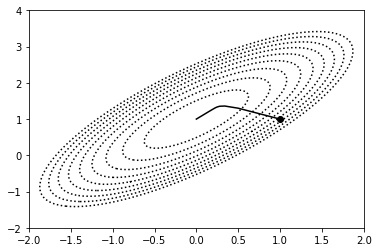

In [44]:
path_x = algo.path_[:, 0] 
path_y = algo.path_[:, 1] 

# 始点と経路の描画
plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(path_x, path_y, color="k", linewidth=1.5)

# 等高線の描画
xs = np.linspace(-2, 2, 100)
ys = np.linspace(-2, 4, 100)
xmesh, ymesh = np.meshgrid(xs, ys)
#xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
xx = np.r_[[xmesh.ravel()], [ymesh.ravel()]]
#print(xx)

levels = np.linspace(-3, 4, 10)
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors="k", linestyles="dotted")

In [45]:
print(len(algo.path_))

159
